In [1]:
import tensorflow as tf
import numpy as np

BATCH_SIZE = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

2023-01-24 03:14:56.689195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
classes = [
    'Common_Rust',
'Blight',
'Healthy',
'Gray_Leaf_Spot'
]

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/msughter/Downloads/data'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        validation_split=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# train_generator = train_datagen.flow_from_directory(
#         base_dir,
#         batch_size=BATCH_SIZE,
#         shuffle=True,
#         target_size=(IMG_HEIGHT, IMG_WIDTH),
#         classes = classes,
#        # subset='training'
# )
# validation data generator
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
        batch_size=BATCH_SIZE,
        #subset='training'
)

Found 4188 images belonging to 4 classes.


In [4]:
model = tf.keras.models.load_model('/Users/msughter/Downloads/maize_model_1.h5')

2023-01-24 03:20:23.275457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from keras.utils import plot_model

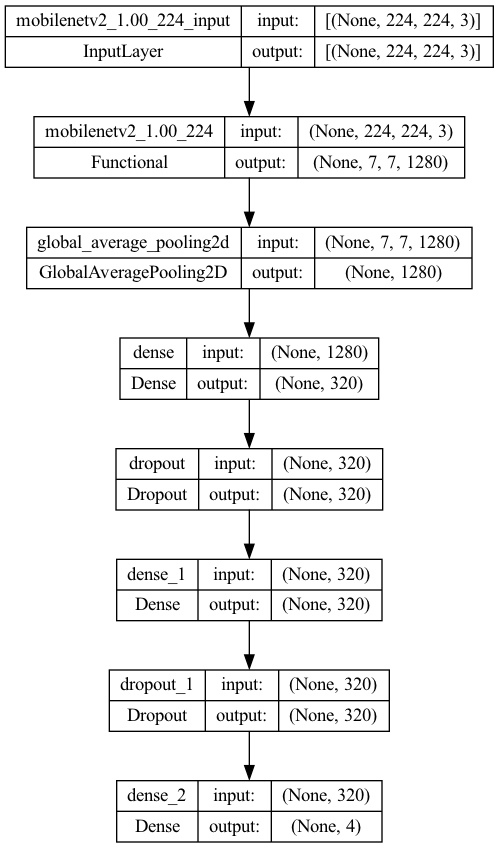

In [8]:
plot_model(model, to_file='maize_model.png',show_shapes=True)

In [5]:
def getData(generator, iterations):
    features = []
    labels = []
    i = 1
    for _,(image_batch,label_batch) in enumerate(generator):
        if i > iterations:
            break
        print(f'extracting features for batch.....{i}')
        for img, label in zip(image_batch,label_batch):
            features.append(img)
            labels.append(label)
        i+=1
    return features, labels


In [9]:
# get 500 images for testing
test_x, test_y = getData(validation_generator,5)

extracting features for batch.....1
extracting features for batch.....2
extracting features for batch.....3
extracting features for batch.....4
extracting features for batch.....5


In [10]:
# importing some evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [11]:
predictions = model.predict(np.array(test_x))

16/16 [==============================] - 12s 614ms/step


In [13]:
predictions = model.predict(np.array(test_x))

16/16 [==============================] - 10s 631ms/step


In [14]:
# reshape predictions and targets
new_predictions = np.argmax(predictions,axis=1)
new_test_y = np.argmax(test_y,axis=1)

new_test_y[10]

1

In [15]:
# get the labels to be used in the confusion
uniques_predictions = np.unique(new_predictions)
unique_test_y = np.unique(new_test_y)
labels=list(set(uniques_predictions).union(set(unique_test_y)))

In [16]:
cm = confusion_matrix(new_test_y,new_predictions,labels=labels)

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

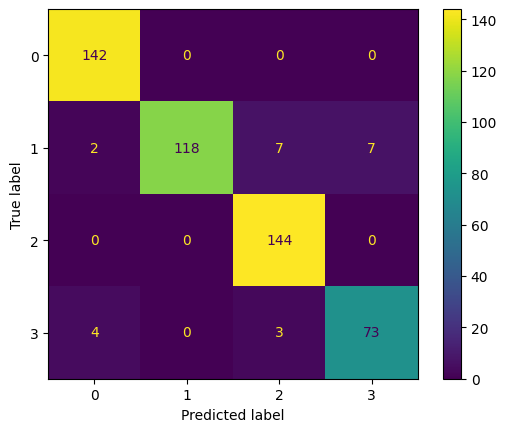

In [18]:
# plot the confusion matrix
disp.plot()

In [19]:
from sklearn.metrics import classification_report
report = classification_report(new_test_y,new_predictions,target_names=classes)
print(report)

                precision    recall  f1-score   support

   Common_Rust       0.96      1.00      0.98       142
        Blight       1.00      0.88      0.94       134
       Healthy       0.94      1.00      0.97       144
Gray_Leaf_Spot       0.91      0.91      0.91        80

      accuracy                           0.95       500
     macro avg       0.95      0.95      0.95       500
  weighted avg       0.96      0.95      0.95       500

